# Task 7
Time Series Forecasting

Select a time-series dataset and implement a forecasting model, such as ARIMA or Prophet, using Python. Visualize the predicted values and compare them with the actual data.

In [2]:
!pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/6d/c8/46d355b3c2d04881ce745c667eba6b08ea2215a1ccae875c64b725c3d348/statsmodels-0.14.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 393.8 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.8 MB 476.3 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.8 MB 476.3 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.8 MB 476.3 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.8 MB 400


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(data_url)
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

In [6]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [7]:
order = (5, 1, 0)  # ARIMA order (p, d, q)
model = ARIMA(train, order=order)
fit_model = model.fit()

c:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [8]:
predictions = fit_model.predict(start=test.index[0], end=test.index[-1], typ='levels')


c:\Users\Vinay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


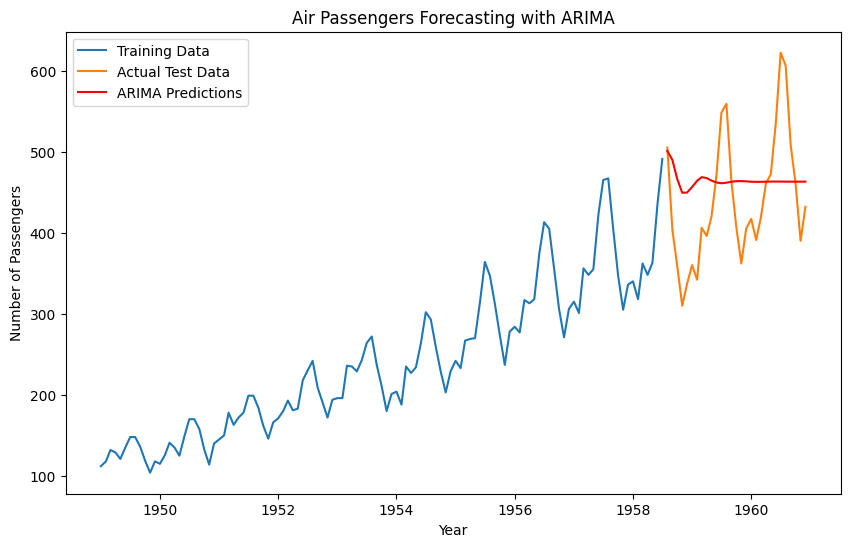

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.title('Air Passengers Forecasting with ARIMA')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [10]:
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 6506.67
